# Big Data Project codes


## Project

This file include version 3 of our project code that clean and optimize data

It also include how we plan data view



## Creating SparkSession

A **SparkSession** is the unified entry point for working with Spark DataFrames.


In [ ]:

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DataFrameLab").getOrCreate()


## Creating DataFrames


### Testing code

Testing code and if we can make totally new workbook


In [ ]:
import os.path
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, desc, round, date_format, format_number, regexp_replace
from pyspark.sql.types import StringType

# Convert minutes to hours and minutes
def convert_to_hours_minutes(runtime):
    if runtime is not None:
        hours, minutes = divmod(runtime, 60)
        return f'{hours}:{minutes:02d}'
    return None

# Define UDF
convert_udf = udf(convert_to_hours_minutes, StringType())

spark = SparkSession.builder.appName("TMDB_movies").getOrCreate()

# Download CSV-file if it doesn't exist in folder
url = 'https://www.dropbox.com/scl/fi/a2ic1uv3j52z8k2g8u4eo/TMDB_movie_dataset_v11.csv?rlkey=i0me0oq07ecscq1nxwmwhcvjv&st=czq2g77s&dl=1'
dataset = 'TMDB_movie_dataset_v11.csv'

if not os.path.exists(dataset):
    import requests
    response = requests.get(url)
    with open(dataset, 'wb') as file:
        file.write(response.content)

# Read dataset with Spark
# Ensuring the reader reads the whole title inside quotation marks
# in case a movie title has a comma
df_movies = spark.read.csv(
    dataset,
    inferSchema=True,
    header=True,
    quote='"',
    escape='"'
)

# Turn "adult" column into boolean
df_movies = df_movies.withColumn('adult', col('adult').cast('boolean'))

# Round average vote score to 2 decimals
df_movies = df_movies.withColumn('vote_average2', round(df_movies.vote_average, 2))

# Reformat release date and runtime
df_movies = df_movies.withColumn('release_date', date_format('release_date', 'dd/MM/yyyy'))
df_movies = df_movies.withColumn('runtime', convert_udf(col('runtime')))

# Reorder columns
df_movies = df_movies.select('title', 'vote_average2', 'release_date', 'revenue',
                            'budget', 'runtime', 'genres', 'production_companies')

# Rename columns
df_movies = df_movies.withColumnRenamed('title', 'Title') \
    .withColumnRenamed('vote_average2', 'Average Vote Score') \
    .withColumnRenamed('release_date', 'Release Date') \
    .withColumnRenamed('revenue', 'Revenue') \
    .withColumnRenamed('budget', 'Budget') \
    .withColumnRenamed('runtime', 'Length') \
    .withColumnRenamed('genres', 'Genres') \
    .withColumnRenamed('production_companies', 'Production Companies')

# Drop unneeded columns
df_movies = df_movies.drop('id', 'vote_average', 'vote_count', 'status', 'adult',
                'backdrop_path', 'homepage', 'imdb_id', 'original_language',
                'original_title', 'overview', 'popularity', 'poster_path',
                'tagline', 'production_countries', 'spoken_languages', 'keywords')

# Print first 5 lines
# Reformat numbers
print('First 5 movies')
first_five = (
    df_movies
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
)
# Replace commas with spaces
first_five = (
    first_five
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
first_five.show(5, truncate = False)

# Print 20 first movies with revenue over 1,000,000,000
# Filter where adult == False
# Reformat numbers and rename columns
print('First 20 movies with revenue over 1 billion')
over_billion_revenue = (
    df_movies
    .where((col('Revenue') > 1000000000) & (col('adult') == False))
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
)
# Replace commas with spaces
over_billion_revenue = (
    over_billion_revenue
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
over_billion_revenue.show(20, truncate = False)

# Print 10 movies with the highest revenue
# Filter where adult == False and vote_count > 1
# Reformat numbers and rename columns
print('Top 10 movies with highest revenue')
highest_revenue = (
    df_movies
    .where((col('adult') == False) & (col('vote_count') > 1))
    .orderBy(desc('Revenue'))
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
)
# Replace commas with spaces
highest_revenue = (
    highest_revenue
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
highest_revenue.show(10, truncate = False)

# Data View

## Testing First style ToPanda()
Testing toPandas() dataframe

In [6]:
import os.path
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, desc, round, date_format, format_number, regexp_replace
from pyspark.sql.types import StringType

# Convert minutes to hours and minutes
def convert_to_hours_minutes(runtime):
    if runtime is not None:
        hours, minutes = divmod(runtime, 60)
        return f'{hours}:{minutes:02d}'
    return None

# Define UDF
convert_udf = udf(convert_to_hours_minutes, StringType())

spark = SparkSession.builder.appName("TMDB_movies").getOrCreate()

# Download CSV-file if it doesn't exist in folder
url = 'https://www.dropbox.com/scl/fi/a2ic1uv3j52z8k2g8u4eo/TMDB_movie_dataset_v11.csv?rlkey=i0me0oq07ecscq1nxwmwhcvjv&st=czq2g77s&dl=1'
dataset = 'TMDB_movie_dataset_v11.csv'

if not os.path.exists(dataset):
    import requests
    response = requests.get(url)
    with open(dataset, 'wb') as file:
        file.write(response.content)

# Read dataset with Spark
# Ensuring the reader reads the whole title inside quotation marks
# in case a movie title has a comma
df_movies = spark.read.csv(
    dataset,
    inferSchema=True,
    header=True,
    quote='"',
    escape='"'
)

# Turn "adult" column into boolean
df_movies = df_movies.withColumn('adult', col('adult').cast('boolean'))

# Round average vote score to 2 decimals
df_movies = df_movies.withColumn('vote_average2', round(df_movies.vote_average, 2))

# Reformat release date and runtime
df_movies = df_movies.withColumn('release_date', date_format('release_date', 'dd/MM/yyyy'))
df_movies = df_movies.withColumn('runtime', convert_udf(col('runtime')))

# Reorder columns
df_movies = df_movies.select('title', 'vote_average2', 'release_date', 'revenue',
                            'budget', 'runtime', 'genres', 'production_companies')

# Rename columns
df_movies = df_movies.withColumnRenamed('title', 'Title') \
    .withColumnRenamed('vote_average2', 'Average Vote Score') \
    .withColumnRenamed('release_date', 'Release Date') \
    .withColumnRenamed('revenue', 'Revenue') \
    .withColumnRenamed('budget', 'Budget') \
    .withColumnRenamed('runtime', 'Length') \
    .withColumnRenamed('genres', 'Genres') \
    .withColumnRenamed('production_companies', 'Production Companies')

# Drop unneeded columns
df_movies = df_movies.drop('id', 'vote_average', 'vote_count', 'status', 'adult',
                'backdrop_path', 'homepage', 'imdb_id', 'original_language',
                'original_title', 'overview', 'popularity', 'poster_path',
                'tagline', 'production_countries', 'spoken_languages', 'keywords')

# Print first 5 lines adding toPandas() below
# Print first 5 lines
# Reformat numbers
first_five = (
    df_movies
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
)
# Replace commas with spaces
first_five = (
    first_five
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
# Convert to Pandas
pandas_first_five = first_five.toPandas()
print("First 5 movies using toPandas:")
print(pandas_first_five.head())
#----------------------------------------------------------------

# Print 20 first movies with revenue over 1,000,000,000
# Filter where adult == False
# Reformat numbers and rename columns
# adding toPandas()
# Print 20 first movies with revenue over 1 billion
over_billion_revenue = (
    df_movies
    .where((col('Revenue') > 1000000000) & (col('adult') == False))
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
)
# Replace commas with spaces
over_billion_revenue = (
    over_billion_revenue
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
# Convert to Pandas
pandas_over_billion = over_billion_revenue.toPandas()
print("First 20 movies with revenue over 1 billion using toPandas:")
print(pandas_over_billion.head(20))
#------------------------------------------------------------------------

# Print 10 movies with the highest revenue
# Filter where adult == False and vote_count > 1
# Reformat numbers and rename columns
# adding toPandas()
# Print 10 first movies with revenue over 1 billion  using toPandas
over_billion_revenue = (
    df_movies
    .where((col('Revenue') > 1000000000) & (col('adult') == False))
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
)
# Replace commas with spaces
over_billion_revenue = (
    over_billion_revenue
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
# Convert to Pandas
pandas_over_billion = over_billion_revenue.toPandas()
print("First 10 movies with revenue over 1 billion using toPandas:")
print(pandas_over_billion.head(20))
#------------------------------------------------------------------

First 5 movies using toPandas:
             Title  Average Vote Score Release Date        Revenue  \
0        Inception                8.36   15/07/2010    825 532 764   
1     Interstellar                8.42   05/11/2014    701 729 206   
2  The Dark Knight                8.51   16/07/2008  1 004 558 444   
3           Avatar                7.57   15/12/2009  2 923 706 026   
4     The Avengers                7.71   25/04/2012  1 518 815 515   

        Budget Length                                       Genres  \
0  160 000 000   2:28           Action, Science Fiction, Adventure   
1  165 000 000   2:49            Adventure, Drama, Science Fiction   
2  185 000 000   2:32               Drama, Action, Crime, Thriller   
3  237 000 000   2:42  Action, Adventure, Fantasy, Science Fiction   
4  220 000 000   2:23           Science Fiction, Action, Adventure   

                                Production Companies  
0  Legendary Pictures, Syncopy, Warner Bros. Pict...  
1  Legendary Pict

## Below how to do different charts with Pandas

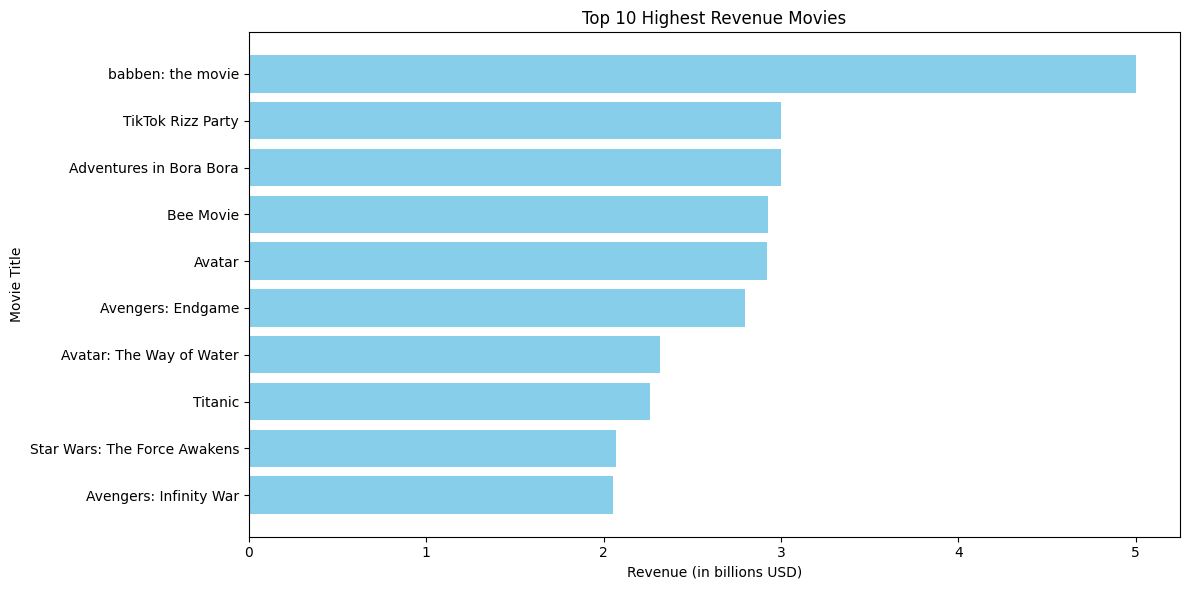

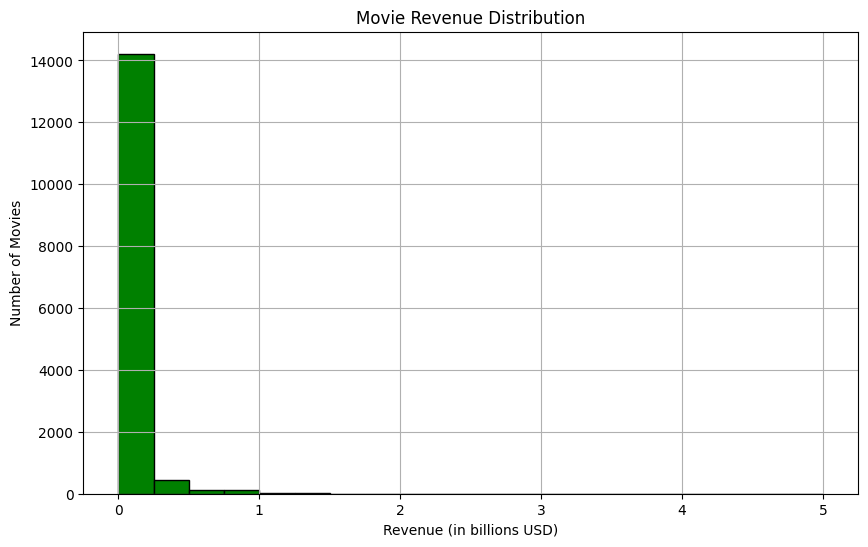

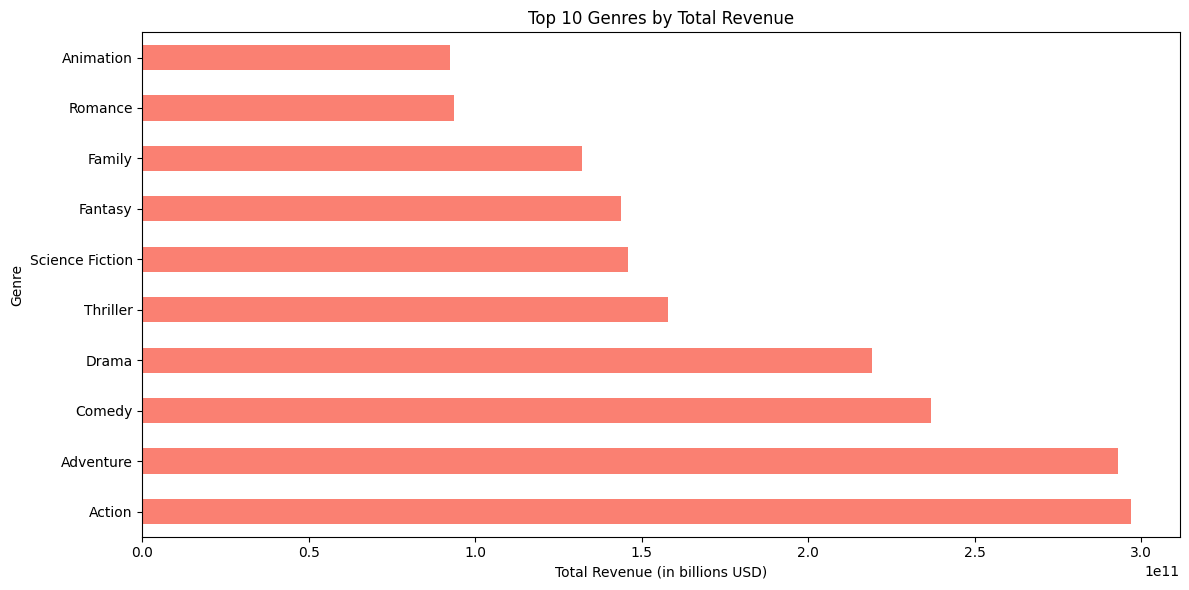

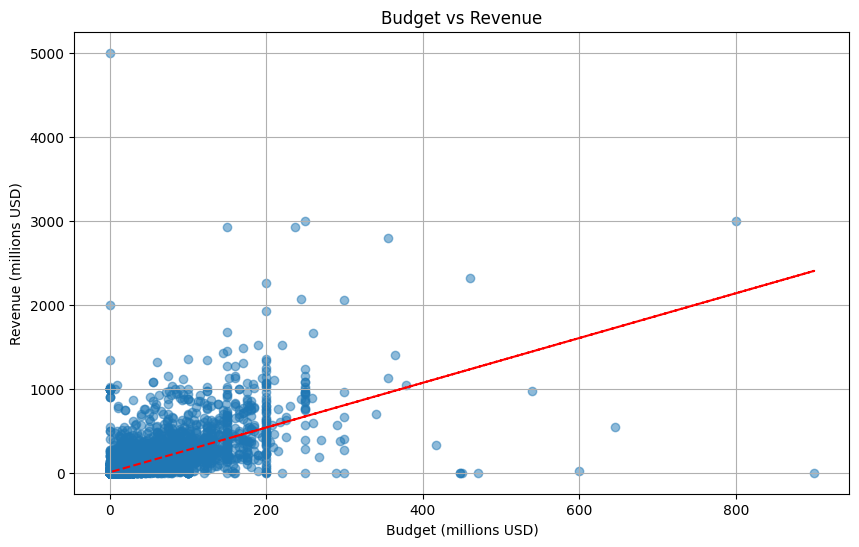

In [20]:
import os.path
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, desc, round, date_format, format_number, regexp_replace
from pyspark.sql.types import StringType
import matplotlib.pyplot as plt
import numpy as np  # <-- This is the missing import

# Convert minutes to hours and minutes
def convert_to_hours_minutes(runtime):
    if runtime is not None:
        hours, minutes = divmod(runtime, 60)
        return f'{hours}:{minutes:02d}'
    return None

# Define UDF
convert_udf = udf(convert_to_hours_minutes, StringType())

spark = SparkSession.builder.appName("TMDB_movies").getOrCreate()

# Download CSV-file if it doesn't exist in folder
url = 'https://www.dropbox.com/scl/fi/a2ic1uv3j52z8k2g8u4eo/TMDB_movie_dataset_v11.csv?rlkey=i0me0oq07ecscq1nxwmwhcvjv&st=czq2g77s&dl=1'
dataset = 'TMDB_movie_dataset_v11.csv'

if not os.path.exists(dataset):
    import requests
    response = requests.get(url)
    with open(dataset, 'wb') as file:
        file.write(response.content)

# Read dataset with Spark
# Ensuring the reader reads the whole title inside quotation marks
# in case a movie title has a comma
df_movies = spark.read.csv(
    dataset,
    inferSchema=True,
    header=True,
    quote='"',
    escape='"'
)

# Turn "adult" column into boolean
df_movies = df_movies.withColumn('adult', col('adult').cast('boolean'))

# Round average vote score to 2 decimals
df_movies = df_movies.withColumn('vote_average2', round(df_movies.vote_average, 2))

# Reformat release date and runtime
df_movies = df_movies.withColumn('release_date', date_format('release_date', 'dd/MM/yyyy'))
df_movies = df_movies.withColumn('runtime', convert_udf(col('runtime')))

# Reorder columns
df_movies = df_movies.select('title', 'vote_average2', 'release_date', 'revenue',
                            'budget', 'runtime', 'genres', 'production_companies')

# Rename columns
df_movies = df_movies.withColumnRenamed('title', 'Title') \
    .withColumnRenamed('vote_average2', 'Average Vote Score') \
    .withColumnRenamed('release_date', 'Release Date') \
    .withColumnRenamed('revenue', 'Revenue') \
    .withColumnRenamed('budget', 'Budget') \
    .withColumnRenamed('runtime', 'Length') \
    .withColumnRenamed('genres', 'Genres') \
    .withColumnRenamed('production_companies', 'Production Companies')

# Drop unneeded columns
df_movies = df_movies.drop('id', 'vote_average', 'vote_count', 'status', 'adult',
                'backdrop_path', 'homepage', 'imdb_id', 'original_language',
                'original_title', 'overview', 'popularity', 'poster_path',
                'tagline', 'production_countries', 'spoken_languages', 'keywords')

#------------------------------------------------------------------
# Visualization Section using toPandas()

# Convert to pandas and clean data
pdf_movies = df_movies.toPandas()

# First ensure we're working with strings for cleaning
pdf_movies['Revenue'] = pdf_movies['Revenue'].astype(str)
pdf_movies['Budget'] = pdf_movies['Budget'].astype(str)

# Now clean numeric columns by removing spaces and converting to float
pdf_movies['Revenue'] = pdf_movies['Revenue'].str.replace(' ', '').replace('None', '0').astype(float)
pdf_movies['Budget'] = pdf_movies['Budget'].str.replace(' ', '').replace('None', '0').astype(float)

# Filter out zeros if they represent missing data
pdf_movies = pdf_movies[(pdf_movies['Revenue'] > 0) & (pdf_movies['Budget'] > 0)]

# 1. Top 10 Highest Revenue Movies (Bar Chart)
top_movies = pdf_movies.nlargest(10, 'Revenue')[['Title', 'Revenue']]

plt.figure(figsize=(12, 6))
plt.barh(top_movies['Title'], top_movies['Revenue']/1e9, color='skyblue')
plt.title('Top 10 Highest Revenue Movies')
plt.xlabel('Revenue (in billions USD)')
plt.ylabel('Movie Title')
plt.gca().invert_yaxis()  # Highest revenue at top
plt.tight_layout()
plt.show()

# 2. Revenue Distribution (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(pdf_movies['Revenue']/1e9, bins=20, color='green', edgecolor='black')
plt.title('Movie Revenue Distribution')
plt.xlabel('Revenue (in billions USD)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

# 3. Revenue by Genre (after splitting genres)
# First clean genres - replace NaN with empty string and strip whitespace
pdf_movies['Genres'] = pdf_movies['Genres'].fillna('').str.strip()

# Split genres and explode into separate rows (only for non-empty genre strings)
pdf_genres = pdf_movies[pdf_movies['Genres'] != ''].copy()
pdf_genres['Genres'] = pdf_genres['Genres'].str.split(',\s*')
pdf_genres = pdf_genres.explode('Genres')

# Calculate total revenue by genre
genre_revenue = pdf_genres.groupby('Genres')['Revenue'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
genre_revenue.plot(kind='barh', color='salmon')
plt.title('Top 10 Genres by Total Revenue')
plt.xlabel('Total Revenue (in billions USD)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 4. Budget vs Revenue Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(pdf_movies['Budget']/1e6, pdf_movies['Revenue']/1e6, alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (millions USD)')
plt.ylabel('Revenue (millions USD)')
plt.grid(True)

# Add correlation line if you want
z = np.polyfit(pdf_movies['Budget']/1e6, pdf_movies['Revenue']/1e6, 1)
p = np.poly1d(z)
plt.plot(pdf_movies['Budget']/1e6, p(pdf_movies['Budget']/1e6), "r--")

plt.show()

##Testin second view Pyspark_dist_explore

Testing how pyspark_dist_explore show data

Need to install: pip install pyspark_dist_explore

In [7]:
#Installing library in google colab
!pip install pyspark_dist_explore

First 5 movies
+---------------+------------------+------------+-------------+-----------+------+-------------------------------------------+-------------------------------------------------------------------------------+
|Title          |Average Vote Score|Release Date|Revenue      |Budget     |Length|Genres                                     |Production Companies                                                           |
+---------------+------------------+------------+-------------+-----------+------+-------------------------------------------+-------------------------------------------------------------------------------+
|Inception      |8.36              |15/07/2010  |825 532 764  |160 000 000|2:28  |Action, Science Fiction, Adventure         |Legendary Pictures, Syncopy, Warner Bros. Pictures                             |
|Interstellar   |8.42              |05/11/2014  |701 729 206  |165 000 000|2:49  |Adventure, Drama, Science Fiction          |Legendary Pictures, Syncopy, Ly

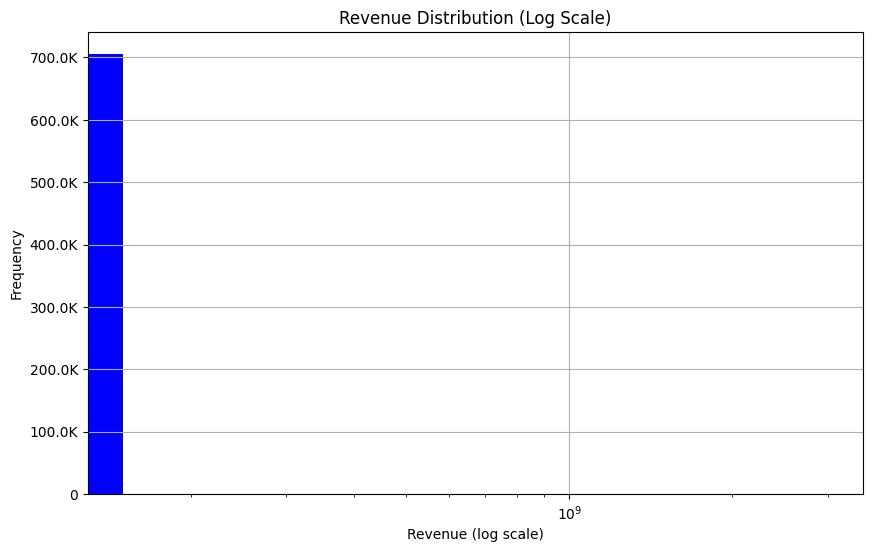

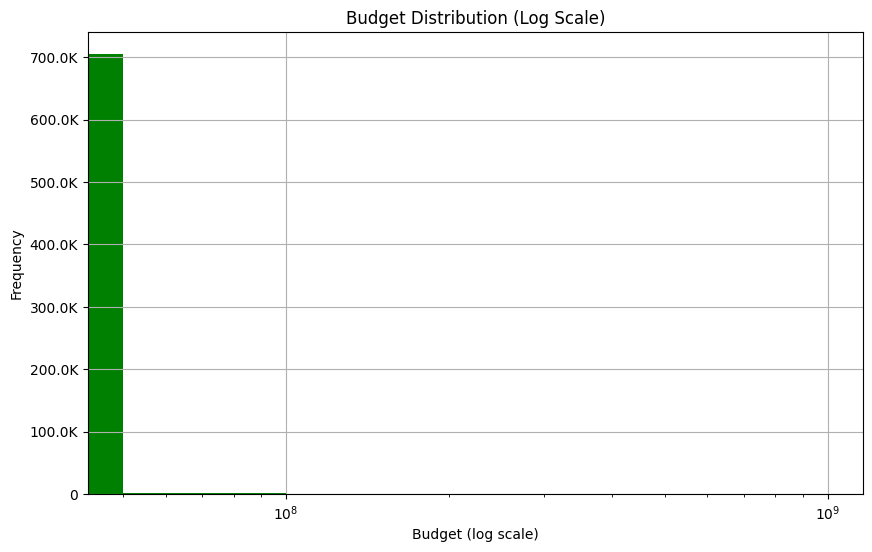

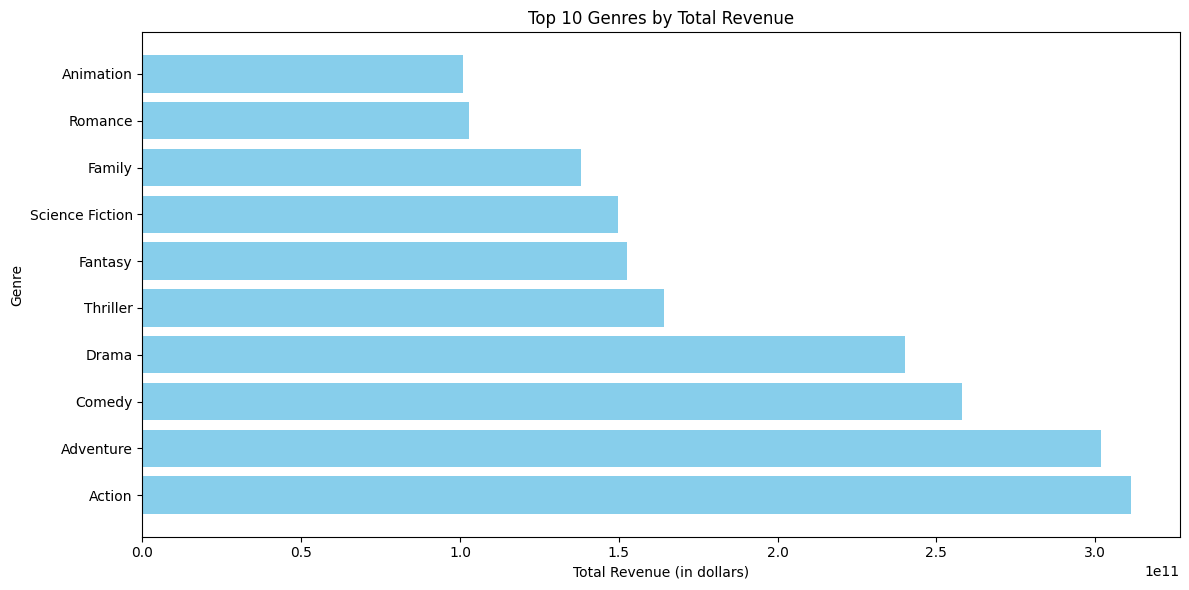

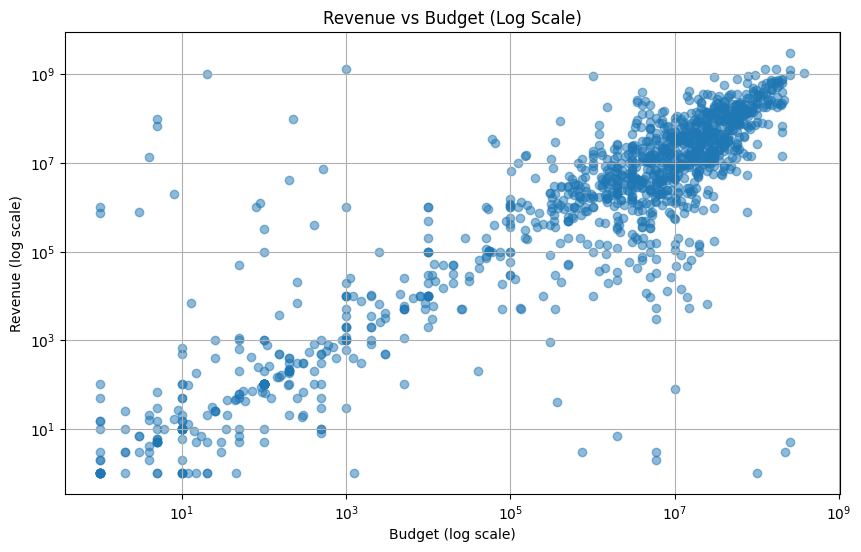

In [16]:
import os.path
import pyspark_dist_explore
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, desc, round, date_format, format_number, regexp_replace, sum
from pyspark.sql.types import StringType, DoubleType
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

# Convert minutes to hours and minutes
def convert_to_hours_minutes(runtime):
    if runtime is not None:
        hours, minutes = divmod(runtime, 60)
        return f'{hours}:{minutes:02d}'
    return None

# Define UDF
convert_udf = udf(convert_to_hours_minutes, StringType())

spark = SparkSession.builder.appName("TMDB_movies").getOrCreate()

# Download CSV-file if it doesn't exist in folder
url = 'https://www.dropbox.com/scl/fi/a2ic1uv3j52z8k2g8u4eo/TMDB_movie_dataset_v11.csv?rlkey=i0me0oq07ecscq1nxwmwhcvjv&st=czq2g77s&dl=1'
dataset = 'TMDB_movie_dataset_v11.csv'

if not os.path.exists(dataset):
    import requests
    response = requests.get(url)
    with open(dataset, 'wb') as file:
        file.write(response.content)

# Read dataset with Spark
df_movies = spark.read.csv(
    dataset,
    inferSchema=True,
    header=True,
    quote='"',
    escape='"'
)

# Data cleaning and transformation
df_movies = df_movies.withColumn('adult', col('adult').cast('boolean'))
df_movies = df_movies.withColumn('vote_average2', round(df_movies.vote_average, 2))
df_movies = df_movies.withColumn('release_date', date_format('release_date', 'dd/MM/yyyy'))
df_movies = df_movies.withColumn('runtime', convert_udf(col('runtime')))

# Select and rename columns
df_movies = df_movies.select('title', 'vote_average2', 'release_date', 'revenue',
                            'budget', 'runtime', 'genres', 'production_companies')

df_movies = df_movies.withColumnRenamed('title', 'Title') \
    .withColumnRenamed('vote_average2', 'Average Vote Score') \
    .withColumnRenamed('release_date', 'Release Date') \
    .withColumnRenamed('revenue', 'Revenue') \
    .withColumnRenamed('budget', 'Budget') \
    .withColumnRenamed('runtime', 'Length') \
    .withColumnRenamed('genres', 'Genres') \
    .withColumnRenamed('production_companies', 'Production Companies')

# Drop unneeded columns
df_movies = df_movies.drop('id', 'vote_average', 'vote_count', 'status', 'adult',
                'backdrop_path', 'homepage', 'imdb_id', 'original_language',
                'original_title', 'overview', 'popularity', 'poster_path',
                'tagline', 'production_countries', 'spoken_languages', 'keywords')

# Show sample data
print('First 5 movies')
first_five = (
    df_movies
    .withColumn('Revenue', format_number(col('Revenue').cast('double'), 0))
    .withColumn('Budget', format_number(col('Budget').cast('double'), 0))
    .withColumn('Revenue', regexp_replace('Revenue', ',', ' '))
    .withColumn('Budget', regexp_replace('Budget', ',', ' '))
)
first_five.show(5, truncate=False)

#----------------------------------------------------
# Visualization section - Fixed code

# First, clean the data properly
from pyspark.sql.functions import when

# Clean numeric columns and convert to proper types
df_movies = (df_movies
    .withColumn('Revenue', regexp_replace(col('Revenue'), ' ', ''))
    .withColumn('Revenue', when(col('Revenue') == '', None).otherwise(col('Revenue')))
    .withColumn('Revenue', col('Revenue').cast('double'))

    .withColumn('Budget', regexp_replace(col('Budget'), ' ', ''))
    .withColumn('Budget', when(col('Budget') == '', None).otherwise(col('Budget')))
    .withColumn('Budget', col('Budget').cast('double'))

    # Clean Genres column - replace empty strings with None
    .withColumn('Genres', when(col('Genres') == '', None).otherwise(col('Genres')))
)

# Filter out null values
df_movies_clean = df_movies.filter(
    col('Revenue').isNotNull() &
    col('Budget').isNotNull() &
    col('Genres').isNotNull()
)

# 1. Revenue Histogram
fig, ax = plt.subplots(figsize=(10, 6))
hist(ax, df_movies_clean.select('Revenue'), bins=20, color='blue')
plt.title('Revenue Distribution (Log Scale)')
plt.xlabel('Revenue (log scale)')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.show()

# 2. Budget Histogram
fig, ax = plt.subplots(figsize=(10, 6))
hist(ax, df_movies_clean.select('Budget'), bins=20, color='green')
plt.title('Budget Distribution (Log Scale)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale for better visualization
plt.grid(True)
plt.show()

# 3. Total Revenue by Genres (Top 10)
# First split genres (they're comma-separated) and explode them
from pyspark.sql.functions import split, explode

genre_revenue = (
    df_movies_clean
    .withColumn('Genre', explode(split(col('Genres'), ',\s*')))  # Split and explode genres
    .groupBy('Genre')
    .agg(sum('Revenue').alias('Total_Revenue'))
    .orderBy(desc('Total_Revenue'))
    .limit(10)  # Limit to top 10 genres
)

# Convert to Pandas and plot
pandas_genre_revenue = genre_revenue.toPandas()

plt.figure(figsize=(12, 6))
plt.barh(pandas_genre_revenue['Genre'], pandas_genre_revenue['Total_Revenue'], color='skyblue')
plt.title('Top 10 Genres by Total Revenue')
plt.xlabel('Total Revenue (in dollars)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 4. Revenue vs Budget scatter plot (log scale)
pandas_movies = df_movies_clean.select('Revenue', 'Budget').sample(0.1).toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pandas_movies['Budget'], pandas_movies['Revenue'], alpha=0.5)
plt.title('Revenue vs Budget (Log Scale)')
plt.xlabel('Budget (log scale)')
plt.ylabel('Revenue (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()
